# BOSS DR12 Notes (v1.3)

In [2]:
# imports
import os
import h5py

from astropy.table import Table, vstack

from linetools.spectra import io as lsio

In [3]:
dpath = os.getenv('RAW_IGMSPEC')+'/BOSS/'

## QSOs

Grabbing catalogs from http://www.sdss.org/dr12/algorithms/boss-dr12-quasar-catalog/

### DR12 Quasar Catalog

Main catalog from BOSS (Paris et al. 2015)

See https://data.sdss.org/datamodel/files/BOSS_QSO/DR12Q/DR12Q.html
for the data model.

Downloaded DR12Q.fits (513 MB): SDSS-DR12Q (Main catalog, fits format)
on 14 June 2016

In [4]:
boss_file = dpath + 'DR12Q.fits.gz'
boss_hdu = fits.open(boss_file)
boss_hdu.info()

Filename: /u/xavier/Raw_IGMspec/BOSS/DR12Q.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (19442,)     uint8   
1    DR12Q.fits  BinTableHDU    644   297301R x 158C   [18A, D, D, J, J, J, J, D, E, E, J, D, D, D, D, D, D, I, K, K, K, K, J, 32J, 32J, 32J, J, J, J, J, I, D, D, 32D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D, D, D, D, D, J, D, D, J, D, D, D, D, D, I, J, 3A, I, I, 19A, 5E, 5E, 5E, 5E, 5D, D, D, 5E, 5E, D, I, D, D, D, D, D, D, I, D, D, D, D, D, D, D, D, D, D, D, D, I, D, I, D, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, I, E, E, E, E, E, E, E, E, I, D, D, D]   


In [5]:
boss_head0 = boss_hdu[0].header
boss_head0

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                19442 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

In [6]:
boss_dr12 = Table(boss_hdu[1].data)
boss_dr12[0:5]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
str18,float64,float64,int32,int32,int32,int32,float64,float32,float32,int32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float32,float32,float32,float32,float64,float64,float64,float32,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64
000000.45+174625.4,0.00189828518376,17.7737391299,268514930,6173,56238,528,2.30909729004,2.3091,0.000943339,0,2.30763868197,-1.0,0.346182279084,2.31230791362,2.30638494927,2.3046866469,0,2199023796224,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0,-1,-1,-1,0,0.537336213179,0.779484925454,-1.0 .. -1.0,0.58568293642,0.915501904005,-1.0,4278.7900341,1595.2886496,2683.5013845,2.15328741853,44.0028643812,1.40097166147,3575.00108901,1554.12165803,2020.87943097,0.706666936497,38.4285671721,15.8517240349,7996.40388327,4579.19012749,3417.21375578,0.223279535625,69.3860000703,17.8808108042,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7713,54741,301,4,231,1237678601842131080,1.03848 .. 2.65843,12.3597 .. 0.852828,22.4398 .. 21.3627,0.287135 .. 0.386405,1.03847694397 .. 2.65843176842,-23.882931269,-0.0820910409093,0.146195 .. 0.0419442,0.113614 .. 0.0338511,21.9297126138,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0.302318871021,8.78557314038,0.727564871311,4.53735896492,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.0,0.0
000000.66+145828.8,0

#### Cut bad z (Z_VI only)

In [26]:
gd = np.any([boss_dr12['Z_PIPE'] > 0., boss_dr12['Z_PCA'] > 0.],axis=0) # CUTS Z_VI
gd.size

297301

In [27]:
np.sum(gd), len(boss_dr12)

(297256, 297301)

### Serendipitous QSOs

http://data.sdss3.org/sas/dr12/boss/qso/DR12Q/DR12Q_sup.fits

As described here https://data.sdss.org/datamodel/files/BOSS_QSO/DR12Q/DR12Q_sup.html

In [16]:
# Read
boss_sup = Table.read(os.getenv('RAW_IGMSPEC')+'/BOSS/DR12Q_sup.fits.gz')

In [17]:
boss_sup[0:5]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,BAL_FLAG_VI,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],EXTINCTION [5]
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,nanomaggies,-,-,-,-
str18,float64,float64,int32,int32,int32,int32,float64,float32,float32,int32,int16,int64,int64,int64,int64,int32,str19,float32,float32,float32,float32,float32
000000.47-002703.9,0.00197831659392,-0.451088294717,85874308,4216,55477,310,0.25,0.249952,4.4377e-05,0,1,0,68719476736,0,0,0,1237657190368346361,2.10464 .. 11.4228,15.7601 .. 1.51615,18.7152 .. 17.2756,0.128812 .. 0.0765538,0.212343 .. 0.0609224
000037.70+160359.5,0.157114829154,16.0665528971,254597890,6139,56192,996,0.458565,0.458563,3.89529e-05,0,1,134,0,0,0,0,1237652944786030861,1.70663 .. 17.5837,15.5332 .. 0.808693,23.9659 .. 20.4371,0.159289 .. 0.068421,0.194462 .. 0.0557924
000051.26-001411.0,0.213592530117,-0.236398018053,87838293,4216,55477,240,0.888,0.887201,0.000178878,0,1,0,68719476736,0,0,0,1237663783660618188,0.694035 .. 4.16114,31.5436 .. 2.58294,24.4937 .. 19.5473,0.25831 .. 0.152964,0.172871 .. 0.0495976
000101.03+302622.1,0.254321250536,30.4394761313,373031013,7134,56566,611,0.499544,0.499543,3.37542e-05,0,1,134,0,0,0,0,1237663234451571295,1.78457 .. 11.853,27.3271 .. 1.46998,24.0116 .. 20.0178,0.114978 .. 0.0749689,0.260662 .. 0.0747855
000107.52+002625.6,0.281357161915,0.440462315429,107727460,4216,55477,804,0.517,0.516782,8.93751e-05,0,1,0,68719476736,0,0,0,1237663277927891418,0.87537 .. 6.88808,28.6253 .. 1.71888,24.9493 .. 20.4644,0.220803 .. 0.117545,0.140934 .. 0.0404347


#### Are these new?

In [19]:
mt = (boss_dr12['PLATE'] == 7134) & (boss_dr12['FIBERID'] == 611)
np.sum(mt)

0

#### Grab the spectra

In [7]:
# List for bulk download
pmf = boss_sup[['PLATE','MJD','FIBERID']]
pmf.write('pmf_12sup.ascii', format='ascii')
#  Had to then strip the first line

#### wget

Used this website:  http://dr12.sdss3.org/bulkSpectra

    wget -i boss_12sup.wget

### Bad QSOs

http://data.sdss3.org/sas/dr12/boss/qso/DR12Q/DR12Q_supbad.fits

As described here https://data.sdss.org/datamodel/files/BOSS_QSO/DR12Q/DR12Q_sup.html

In [1]:
# Read
boss_supbad = Table.read(os.getenv('RAW_IGMSPEC')+'/BOSS/DR12Q_supbad.fits.gz')

In [10]:
boss_supbad[0:5]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,BAL_FLAG_VI,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],EXTINCTION [5]
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,nanomaggies,-,-,-,-
str18,float64,float64,int32,int32,int32,int32,float64,float64,float64,int32,int32,int64,int64,int64,int64,int32,str1,float64,float64,float64,float64,float64
000007.58+002943.2,0.0316202501735,0.495352427337,107544857,3579,55156,526,2.254,-1.0,-1.0,-1,-1,212992,0,8,0,0,-,4.642229 .. 10.624799,14.9521355341 .. 1.21605179476,20.8331835993 .. 19.934198193,0.0588600934875 .. 0.088924470481,-1.0 .. -1.0
000031.86+010305.2,0.13278002,1.051468,122289751,3579,55156,548,1.093,-1.0,-1.0,-1,-1,219136,0,0,0,0,-,7.5559435 .. 15.909699,5.2021329217 .. 0.384375227386,20.3042782455 .. 19.495845092,0.0612405683737 .. 0.104844818233,-1.0 .. -1.0
000046.69+010951.2,0.19454298,1.1642317,122100129,3579,55156,546,4.248,-1.0,-1.0,-1,-1,197632,536870912,0,0,0,-,0.2220063 .. 2.2459931,19.3163281686 .. 1.39079065695,24.1340867529 .. 21.6214789557,0.765997462035 .. 0.347758989747,-1.0 .. -1.0
000058.35+002528.2,0.24312808729,0.424511482186,107540212,3579,55156,566,0.864,-1.0,-1.0,-1,-1,217088,0,0,0,0,-,2.4312067 .. 6.6052165,21.9473847961 .. 1.70871590958,21.5354452902 .. 20.4502823572,0.0913710645505 .. 0.11898391364,-1.0 .. -1.0
000119.36+010524.7,0.330699829376,1.09021810727,122099513,3579,55156,588,2.305,-1.0,-1.0,-1,-1,20480,68719476736,0,0,0,-,2.0136375 .. 5.677794,16.4324544832 .. 0.661345103074,21.7400467738 .. 20.6145509212,0.125474441775 .. 0.212846317686,-1.0 .. -1.0


#### Are these new?

In [11]:
mt = (boss_dr12['PLATE'] == 3579) & (boss_dr12['FIBERID'] == 526)
np.sum(mt)

0

#### Grab the spectra

Grabbed from the website directly:
    
http://data.sdss3.org/sas/dr12/boss/qso/DR12Q/spec_supbad.tar.gz

## Stack

In [18]:
boss_meta = vstack([boss_dr12, boss_sup, boss_supbad], join_type='outer')

In [20]:
boss_meta[-10:]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,,,,,,,-,-,-,-,-,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,-,,,,,,,,,,,,,,,,,,,,-,nanomaggies,-,-,-,,,,-,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
str18,float64,float64,int32,int32,int32,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,int32,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64
230347.27+011011.7,345.94698,1.169929,123067307,3564,55146,708,1.133,-1.0,-1.0,-1,--,--,--,--,--,--,-1,5120,0,0,0,--,-- .. --,-- .. --,-- .. --,--,--,--,--,--,--,--,-- .. --,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-,8.683229 .. 11.941104,8.80785300705 .. 1.7332649897,20.1532968633 .. 19.807388798,0.0413347074024 .. 0.0669556770567,-- .. --,--,--,-1.0 .. -1.0,-- .. --,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
230400.66+004357.9,346.002777736,0.732774210243,112426843,3564,55146,720,0.754,-1.0,-1.0,-1,--,--,--,--,--,--,-1,137216,0,0,0,--,-- .. --,-- .. --,-- .. --,--,--,--,--,--,--,--,-- .. --,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-,2.5841134 .. 8.967807,

## DR12 spectra

In [21]:
hdu = fits.open(os.getenv('RAW_IGMSPEC')+'/BOSS/DR12_ALLQSO_SPEC_106_flux_nointerp.fits.gz')

KeyboardInterrupt: 

In [ ]:
hdu.info()

## KG file

In [1]:
kg_file = os.getenv('RAW_IGMSPEC')+'/BOSS/BOSSLyaDR12_spectra_v1.0/6981/speclya-6981-56443-0988.fits.gz'

In [2]:
hdu = fits.open(kg_file)

In [3]:
hdu.info()

Filename: /raid/Raw_IGMspec//BOSS/BOSSLyaDR12_spectra_v1.0/6981/speclya-6981-56443-0988.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     121   ()              
1    COADD       BinTableHDU     49   4573R x 12C   [E, E, E, J, J, E, E, E, J, E, E, E]   
2    SPALL       BinTableHDU    483   1R x 232C    [27A, 14A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 6A, 6A, 16A, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 16A, 9A, 12A, E, E, E, E, E, E, E, E, J, E, E, J, J, 6A, 21A, E, 35E, K, 19A, 19A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D, D, D, 5E, 5E, 5E, 5E, 5E, 5E, 

In [4]:
tbl1 = Table(hdu[1].data)

In [5]:
tbl1

FLUX,LOGLAM,IVAR,AND_MASK,OR_MASK,WDISP,SKY,MODEL,MASK_COMB,DLA_CORR,NOISE_CORR,CONT
float32,float32,float32,int32,int32,float32,float32,float32,int32,float32,float32,float32
-0.294479,3.558,0.0357123,0,0,1.66066,3.57509,2.86019,0,1.0,1.0,2.18591
-1.67659,3.5581,0.0367515,0,0,1.66048,4.65237,2.72961,0,1.0,1.0,2.18358
7.52545,3.5582,0.041008,0,0,1.66031,5.30107,2.74509,0,1.0,1.0,2.18217
-4.92432,3.5583,0.0475623,0,0,1.66013,5.70066,2.9051,0,1.0,1.0,2.18105
2.78489,3.5584,0.0547794,0,0,1.65995,5.82691,3.10513,0,1.0,1.0,2.17984
0.645774,3.5585,0.0535421,0,0,1.65977,5.85475,3.20858,0,1.0,1.0,2.17859
4.26268,3.5586,0.0609553,0,0,1.65959,5.38368,3.13573,0,1.0,1.0,2.1767
7.56473,3.5587,0.0644704,0,0,1.65941,5.30146,3.05986,0,1.0,1.0,2.17463
-7.90701,3.5588,0.0773656,0,0,1.65923,5.1609,3.04018,0,1.0,1.0,2.17295


In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


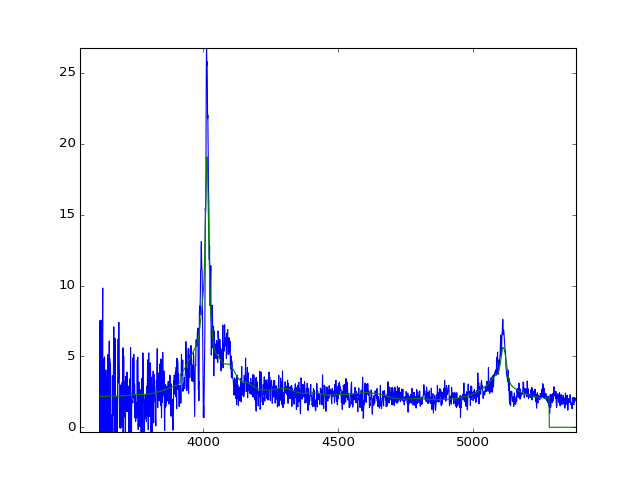

In [10]:
xdb.xplot(10**tbl1['LOGLAM'], tbl1['FLUX'], tbl1['CONT'])

In [11]:
tmp= hdu[1].data

In [12]:
tmp['FLUX']

array([-0.29447865, -1.67659271,  7.52545166, ..., -6.52935886,
       -2.51877236,  7.41593266], dtype=float32)

## Debug

In [6]:
boss_file = dpath + 'DR12Q.fits.gz'
boss_hdu = fits.open(boss_file)

In [8]:
boss_dr12 = Table(boss_hdu[1].data)
boss_dr12[0:5]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
str18,float64,float64,int32,int32,int32,int32,float64,float32,float32,int32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float32,float32,float32,float32,float64,float64,float64,float32,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64
000000.45+174625.4,0.00189828518376,17.7737391299,268514930,6173,56238,528,2.30909729004,2.3091,0.000943339,0,2.30763868197,-1.0,0.346182279084,2.31230791362,2.30638494927,2.3046866469,0,2199023796224,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0,-1,-1,-1,0,0.537336213179,0.779484925454,-1.0 .. -1.0,0.58568293642,0.915501904005,-1.0,4278.7900341,1595.2886496,2683.5013845,2.15328741853,44.0028643812,1.40097166147,3575.00108901,1554.12165803,2020.87943097,0.706666936497,38.4285671721,15.8517240349,7996.40388327,4579.19012749,3417.21375578,0.223279535625,69.3860000703,17.8808108042,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7713,54741,301,4,231,1237678601842131080,1.03848 .. 2.65843,12.3597 .. 0.852828,22.4398 .. 21.3627,0.287135 .. 0.386405,1.03847694397 .. 2.65843176842,-23.882931269,-0.0820910409093,0.146195 .. 0.0419442,0.113614 .. 0.0338511,21.9297126138,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0.302318871021,8.78557314038,0.727564871311,4.53735896492,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.0,0.0
000000.66+145828.8,0

### No non-zero fluxes for 6178, 281

In [11]:
mt = np.where((boss_dr12['PLATE']==6178) & (boss_dr12['FIBERID']==281))[0]
mt

array([3248])

In [12]:
boss_dr12[mt[0]]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
str18,float64,float64,int32,int32,int32,int32,float64,float32,float32,int32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float32,float32,float32,float32,float64,float64,float64,float32,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64
001115.23+144601.8,2.81348678941,14.7671681257,241707462,6178,56213,281,4.96432256699,4.96432,0.000358928,0,4.98618008401,0.0029425848199,0.049600861933,4.91878721837,-1.0,-1.0,0,4096,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,1,751,52251,39,0,500.0,3.7812713118,-1.0 .. -1.0,1.71010944631,-1.0,-1.0,5709.26041358,2919.80952949,2789.45088409,1.98865993315,3.54861141621,3.96743936922,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2566,52170,301,3,327,1237656495114879258,0.100094 .. 57.3163,20.4242 .. 0.547341,24.2544 .. 18.1041,0.80794 .. 0.025596,0.100094385445 .. 57.3163299561,-29.240404458,-1.07065343857,0.272307 .. 0.0781264,0.109449 .. 0.0326101,21.9549898177,0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.22689005508e-13,9.51328029346e-15,1.277183e-13,2.2887408326e-15,1.959233e-13,8.56356984094e-14,3.22689005508e-13,9.51328029346e-15,8.6782791078e+46,5.26908901363e+46,8.6782791078e+46,3.43480885824e+46,-32768,0.108192579693,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,15.286,0.0390000008047,27.6,1.325,14.689,0.0590000003576,18.4,1.049,11.522,0.206000000238,5.3,0.9391,9.004,0.490999996662,2.2,0.0,0000,AABC,0.2709640293

#### Looks fine on the web page;  z=4.964 QSO

#### Examining in IDL
    fx = mrdfits('DR12_ALLQSO_SPEC_106_flux_nointerp.fits',1)
    mt = where(fx.plate EQ 6178 and fx.fiber EQ 281)

### No continuum for 4403, 0848

In [14]:
mt = np.where((boss_dr12['PLATE']==4403) & (boss_dr12['FIBERID']==848))[0]
mt

array([28885])

In [15]:
boss_dr12[mt[0]]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
str18,float64,float64,int32,int32,int32,int32,float64,float32,float32,int32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float32,float32,float32,float32,float64,float64,float64,float32,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64
015303.65+063027.2,28.2652349991,6.50756261131,169873473,4403,55536,848,2.51666498184,2.51666,0.000363433,0,2.50995565979,0.000791652557205,0.121793631558,2.51343318305,2.51200554124,-1.0,0,16492674564096,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0,-1,-1,-1,1,-0.602274933928,37.3127077439,-1.0 .. -1.0,36.8344391436,0.998600308035,-1.0,2716.61671023,1550.93074634,1165.68596389,5.92788176733,37.2684244751,1.56120636639,2886.7173085,1451.27577464,1435.44153387,2.19716859306,23.6776814208,4.10517507042,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5065,53353,301,3,62,1237667228220785117,1.12776 .. 3.22739,22.1526 .. 1.11203,22.3531 .. 21.1748,0.198521 .. 0.289981,1.07475423813 .. 3.32800769806,-24.6468625902,0.0729340538383,0.333949 .. 0.0958121,0.053882 .. 0.016054,21.9607442066,6,1.65636837482,0.0906365811825,-0.0690748766065,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,1,4.04862e-32,3.41356e-32,6.3501e-32,5.90812e-32,1.24759e-31,5.52526e-32,1.51152e-31,6.08412e-32,0,0.0,0.0,0.0


In [19]:
hdu = fits.open('/raid/Raw_IGMspec//BOSS/DR12Q/spec-4403-55536-0848.fits.gz')
hdu.info()

Filename: /raid/Raw_IGMspec//BOSS/DR12Q/spec-4403-55536-0848.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (4607,)      float32   
1                ImageHDU         6   (4607,)      float32   
2                ImageHDU         6   (4607,)      float32   
3                ImageHDU         6   (4607,)      float32   


In [21]:
hdu[3].data

array([ nan,  nan,  nan, ...,  nan,  nan,  nan], dtype=float32)

In [23]:
spec = lsio.readspec('/raid/Raw_IGMspec//BOSS/DR12Q/spec-4403-55536-0848.fits.gz')

In [24]:
spec.co

/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:422: UserWarning: This spectrum does not contain an input continuum array
  warnings.warn("This spectrum does not contain an input continuum array")


nan

### Another problem child -- 4217-55478-0850

In [21]:
mt = np.where((boss_dr12['PLATE']==4217) & (boss_dr12['FIBERID']==850))[0]
boss_dr12[mt[0]]

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,NSPEC_BOSS,PLATE_DUPLICATE [32],MJD_DUPLICATE [32],FIBERID_DUPLICATE [32],SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,ALPHA_NU,SNR_SPEC,SNR_DUPLICATE [32],SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],TARGET_FLUX [5],MI,DGMI,EXTINCTION [5],EXTINCTION_RECAL [5],HI_GAL,VAR_MATCHED,VAR_CHI2,VAR_A,VAR_GAMMA,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,N_DETECTION_XMM,FLUX02_12KEV_SGL,ERR_FLUX02_12KEV_SGL,FLUX02_2KEV,ERR_FLUX02_2KEV,FLUX2_12KEV,ERR_FLUX2_12KEV,FLUX02_12KEV,ERR_FLUX02_12KEV,LUM02_2KEV_SGL,LUM05_2KEV,LUM2_12KEV,LUM02_2KEV,LUMX2_10_UPPER,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAG,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
str18,float64,float64,int32,int32,int32,int32,float64,float32,float32,int32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float32,float32,float32,float32,float64,float64,float64,float32,float32,float64,int16,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64
000746.92+001543.0,1.94551997625,0.261949066486,102736022,4217,55478,850,2.479,0.0,0.0,646,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,4096,0,8,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0,-1,-1,-1,0,500.0,18.0162274611,-1.0 .. -1.0,17.5962007757,0.998584490539,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,-1.0,-1.0,-1.0,4207,52936,301,4,384,1237663543696818545,2.80416 .. 19.4646,15.693 .. 0.877697,21.3778 .. 19.2753,0.0972556 .. 0.0593684,2.64135813713 .. 19.4970245361,-26.4513873161,0.582347258925,0.363024 .. 0.104154,0.155831 .. 0.0464295,21.984099559,73,8.08155155182,0.0897826775908,0.286785572767,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0.0772501602769,581.847663671,-6.0397269408e-05,451.712492012,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,15.96,0.0570000000298,19.1,0.9239,14.648,0.0670000016689,16.2,0.9181,10.95,0.153999999166,7.0,0.9533,7.782,-999.999023438,1.8,0.0,0000,AABU,0.031193482165,1,6.95101e-31,3.60068e-32,7.94083e-31,5.25819e-32,0.0,nan,0.0,nan,0,0.0,0.0,0.0


#### Bad Z_PIPE, ok Z_VI

## Missing $z>4.8$ in Zhu files
    He wasn't comfortable getting continua for these

In [19]:
hiz = boss_dr12['Z_PIPE'] > 4.7
hiz2 = boss_dr12['Z_PCA'] > 4.7

In [20]:
np.sum(hiz),  np.sum(hiz2)

(795, 236)

In [15]:
np.where(hiz)[0][0],np.where(hiz2)[0][0]

(1739, 2257)

### Grab the spectra

In [10]:
# List for bulk download
pmf = boss_dr12[['PLATE','MJD','FIBERID']][hiz]
pmf.write(os.getenv('RAW_IGMSPEC')+'/BOSS/pmf_12hiz.ascii', format='ascii')
#  Had to then strip the first line

#### wget

Used this website:  http://dr12.sdss3.org/bulkSpectra

    Used firefox for copy/paste (Chrome failed)

Then:

    cd hiz
    wget -i ../boss_12hiz.wget